# Content

*    ### [Setup ](#SETUP)
*    ### [Question 1](#Q1)
*    ### [Question 2](#Q2)
*    ### [Question 3](#Q3)
*    ### [Question 4](#Q4)
*    ### [Question 5](#Q5)
*    ### [Discussion](#Discuss)



# <a name="SETUP">Setup</a>

In [1]:
# import Libraries
import tensorflow
import pandas as pd
import time
import numpy as np

# tensorflow libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# sklearn libraries are useful for preprocessing, performance measures, etc.
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

## Data Preperation

In [2]:
df = pd.read_csv('./features_30_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [3]:
# Check class distribution
df['label'].value_counts()

hiphop       100
pop          100
rock         100
metal        100
reggae       100
disco        100
classical    100
blues        100
jazz         100
country      100
Name: label, dtype: int64

### Split and scale dataset

In [4]:
columns_to_drop = ['label','filename', 'length']

def prepare_dataset(df, columns_to_drop, test_size, random_state):

    # Encode the labels from 0 to n_classes-1  
    label_encoder = preprocessing.LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['label'])
  
    # devide data to train and test
    df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)
    
    # scale the training inputs
    x_train = df_train.drop(columns_to_drop,axis=1)
    y_train = df_train['label'].to_numpy()
    
    standard_scaler = preprocessing.StandardScaler()
    x_train_scaled = standard_scaler.fit_transform(x_train)

    #scale and prepare testing data
    x_test = df_test.drop(columns_to_drop,axis=1)
    x_test_scaled = standard_scaler.transform(x_test)
    y_test = df_test['label'].to_numpy() 
  
    return x_train_scaled, y_train, x_test_scaled, y_test

In [5]:
X_train, y_train, X_test, y_test = prepare_dataset(df, columns_to_drop, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape)

(700, 57) (700,)
(300, 57) (300,)


In [6]:
# Convert labels to binary class matrix for Softmax
num_labels=len(df['label'].unique())
y_train = keras.utils.to_categorical(y_train, num_labels)
y_test = keras.utils.to_categorical(y_test, num_labels)
# Check data shape before training
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape)

(700, 57) (700, 10)
(300, 57) (300, 10)


### Functions to plot model performance

In [7]:
def plot_accuracy(model):
    plt.plot(model.history['accuracy'])
    plt.plot(model.history['val_accuracy'])
    plt.title('Accuracy of Training and Testing Data')
    plt.ylabel('Accuracy')
    plt.xlabel('Training epochs')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [8]:
def plot_loss(model):
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Training epochs')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# <a name="Q1">Question 1</a>

In [9]:
# Model Architecture
model = Sequential([
    Dense(16, activation='relu', input_shape=(57,)),
    Dropout(0.3),
    Dense(units = num_labels, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                928       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 1,098
Trainable params: 1,098
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Question 1 Part A

In [11]:
history = model.fit(
    X_train, y_train,batch_size=1, epochs=50, verbose=1,validation_data=(X_test, y_test)
)
keras.backend.clear_session()

Epoch 1/50
700/700 [==============================] - 2s 2ms/step - loss: 2.0120 - accuracy: 0.2971 - val_loss: 1.6561 - val_accuracy: 0.4167
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 1.6024 - accuracy: 0.4457 - val_loss: 1.4230 - val_accuracy: 0.5133
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 1.3981 - accuracy: 0.5100 - val_loss: 1.3237 - val_accuracy: 0.5367
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 1.3134 - accuracy: 0.5257 - val_loss: 1.2339 - val_accuracy: 0.5633
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 1.1969 - accuracy: 0.5729 - val_loss: 1.1784 - val_accuracy: 0.5767
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 1.1835 - accuracy: 0.5700 - val_loss: 1.1655 - val_accuracy: 0.5733
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 1.0988 - accuracy: 0.6214 - val_loss: 1.1041 - val_accuracy: 0.6000
Epoch 

## Question 1 Part B

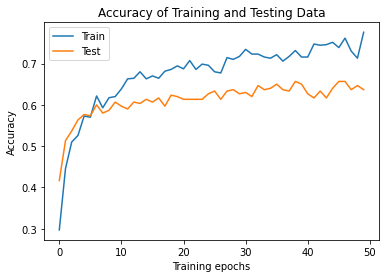

In [12]:
plot_accuracy(history)


Comment:  

Model achieves approximate 70% accuracy on training data, approximate 65% on test data

## Question 1 Part C

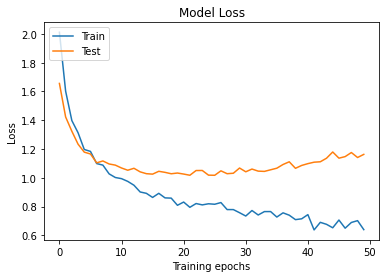

In [13]:
plot_loss(history)


Comment:
 
Test Loss begins to converge approximately in epoch 10.

# <a name="Q2">Question 2</a>

In [14]:
# Using Kfold library from sklearn
from sklearn.model_selection import KFold

In [15]:
# Callback to calculate time for each epoch
class timecallback(tf.keras.callbacks.Callback):
    def __init__(self):
        # use this value as reference to calculate cummulative time taken
        self.times = []
        
    def on_epoch_begin(self,epoch,logs = {}):
        self.timetaken = time.time()
        
    def on_epoch_end(self,epoch,logs = {}):
        self.times.append(time.time() - self.timetaken)
        
    

## Question 2 Part A

------------------------------------------------------------------------
Training for batch_size 1 fold 1 ...
------------------------------------------------------------------------
Training for batch_size 1 fold 2 ...
------------------------------------------------------------------------
Training for batch_size 1 fold 3 ...

Mean Accuracy for batch_size 1 is 67.14% (+/- 0.49%)
------------------------------------------------------------------------
Training for batch_size 4 fold 1 ...
------------------------------------------------------------------------
Training for batch_size 4 fold 2 ...
------------------------------------------------------------------------
Training for batch_size 4 fold 3 ...

Mean Accuracy for batch_size 4 is 65.14% (+/- 2.06%)
------------------------------------------------------------------------
Training for batch_size 8 fold 1 ...
------------------------------------------------------------------------
Training for batch_size 8 fold 2 ...
------------

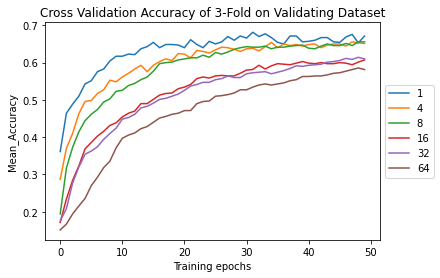

In [16]:
# 3 Fold with shuffle
k_fold = KFold(n_splits=3, shuffle=True)
batch_sizes=[1,4,8,16,32,64]

# Store median times of training epochs for each batch
median_times_per_batch=[]


# Loop over batch_sizes
for i in batch_sizes:
    model_history_per_fold=[]
    times_per_fold=[]
    fold_no=1

    for train, test in k_fold.split(X_train,y_train):
        model = Sequential([
        Dense(16, activation='relu', input_shape=(57,)),
        Dropout(0.3),
        Dense(units = num_labels, activation='softmax')
        ])
        model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
        
        # Generate a print
        print('------------------------------------------------------------------------')
        print(f'Training for batch_size {i} fold {fold_no} ...')

        timetaken = timecallback()
        history = model.fit(
        X_train[train],y_train[train],batch_size=i, epochs=50, verbose=0,validation_data=(X_train[test],y_train[test]),callbacks = [timetaken]
        )
        
        # Generate generalization metrics
        #scores = model.evaluate(X_train[test], y_train[test], verbose=0)
        #print(f'Score for batch_size {i} fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
        model_history_per_fold.append(history)
        times_per_fold.append(timetaken)
        fold_no = fold_no + 1
        keras.backend.clear_session()

    # Get mean validation accuracy in a numpy array
    mean_val_accuracy_arr=np.array([model_history_per_fold[0].history['val_accuracy'],
                                model_history_per_fold[1].history['val_accuracy'],
                                model_history_per_fold[2].history['val_accuracy']])
    mean_val_accuracy=np.mean(mean_val_accuracy_arr, axis=0)

    # Get median time for epochs in a numpy array
    median_time=np.median(np.array([times_per_fold[0].times,
                                    times_per_fold[1].times,
                                    times_per_fold[2].times]))
    
    median_times_per_batch.append(median_time)
    print('')
    print('Mean Accuracy for batch_size %d is %.2f%% (+/- %.2f%%)'%(i,mean_val_accuracy[-1]*100,np.std(mean_val_accuracy_arr, axis=0)[-1]*100))
    plt.plot(mean_val_accuracy,label=i)

    
plt.title('Cross Validation Accuracy of 3-Fold on Validating Dataset')
plt.ylabel('Mean_Accuracy')
plt.xlabel('Training epochs')
plt.legend(batch_sizes, loc='center left', bbox_to_anchor=(1, 0.5)) 


## Question 2 Part B

In [17]:
median_time_df=pd.DataFrame(list(zip(batch_sizes,median_times_per_batch)),columns=['Batch_Size','Median_Time_Per_Epoch'])
median_time_df

,Batch_Size,Median_Time_Per_Epoch
0,1,0.781269
1,4,0.198111
2,8,0.137259
3,16,0.068838
4,32,0.052799
5,64,0.044979


## Question 2 Part C

Comment: 

From the cross validation accuracy graph above, we can see that batch size 1,4,8 share similar mean accuracy which is around 65% . However, median training time taken for one epoch for batch size 1 is 0.76s, which is approximately 4 times of batch size 4. Median training time for batch size 4 and 8 does not differ much.
Hence, optimal batch size will be 8 for fixed 50 epochs.

## Question 2 Part D

Comment: 

Stochastic gradient descent requires that the model make a prediction and have the weights updated for each training example, while for mini-batch gradient descent, weights are updated in batches. 

This makes stochastic gradient descent has a dramatically slower training process as compared to mini-batch gradient descent because of the time is taken to predict and update weights for each training example. Mini-batch gradient descent is faster in learning because of the vectorization advantage. 

Stochastic gradient descent is also too noisy in cost minimization (gradient descent in the wrong direction). It won't ever converge to reach the minimum cost. Small batch sizes results generally in rapid learning but a volatile learning process with higher variance in the classification accuracy

## Question 2 Part E

In [18]:

model = Sequential([
    Dense(16, activation='relu', input_shape=(57,)),
    Dropout(0.3),
    Dense(units = num_labels, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,batch_size=8, epochs=50, verbose=1,validation_data=(X_test, y_test)
)

Epoch 1/50
88/88 [==============================] - 1s 4ms/step - loss: 2.5262 - accuracy: 0.1571 - val_loss: 2.1152 - val_accuracy: 0.2467
Epoch 2/50
88/88 [==============================] - 0s 3ms/step - loss: 2.0954 - accuracy: 0.2800 - val_loss: 1.8720 - val_accuracy: 0.3467
Epoch 3/50
88/88 [==============================] - 0s 2ms/step - loss: 1.9294 - accuracy: 0.3414 - val_loss: 1.7160 - val_accuracy: 0.3867
Epoch 4/50
88/88 [==============================] - 0s 2ms/step - loss: 1.7653 - accuracy: 0.3686 - val_loss: 1.6075 - val_accuracy: 0.4300
Epoch 5/50
88/88 [==============================] - 0s 3ms/step - loss: 1.6082 - accuracy: 0.4443 - val_loss: 1.5227 - val_accuracy: 0.4467
Epoch 6/50
88/88 [==============================] - 0s 3ms/step - loss: 1.5375 - accuracy: 0.4271 - val_loss: 1.4593 - val_accuracy: 0.4900
Epoch 7/50
88/88 [==============================] - 0s 3ms/step - loss: 1.4803 - accuracy: 0.4529 - val_loss: 1.4103 - val_accuracy: 0.4967
Epoch 8/50
88/88 [==

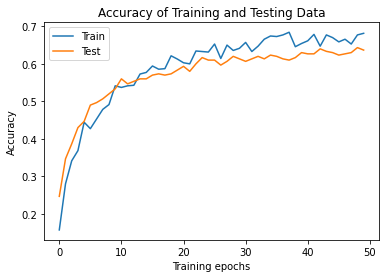

In [19]:
plot_accuracy(history)


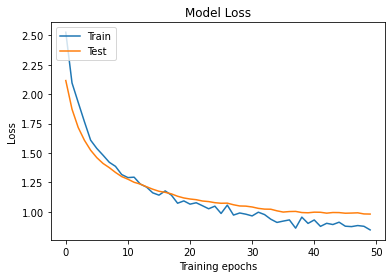

In [20]:
plot_loss(history)


# <a name="Q3">Question 3</a>

## Question 3 Part A

------------------------------------------------------------------------
Training for number of neuron 8 fold 1 ...
------------------------------------------------------------------------
Training for number of neuron 8 fold 2 ...
------------------------------------------------------------------------
Training for number of neuron 8 fold 3 ...

Mean Accuracy for number of neuron 8 is 59.00% (+/- 2.12%)
------------------------------------------------------------------------
Training for number of neuron 16 fold 1 ...
------------------------------------------------------------------------
Training for number of neuron 16 fold 2 ...
------------------------------------------------------------------------
Training for number of neuron 16 fold 3 ...

Mean Accuracy for number of neuron 16 is 64.57% (+/- 0.53%)
------------------------------------------------------------------------
Training for number of neuron 32 fold 1 ...
---------------------------------------------------------------

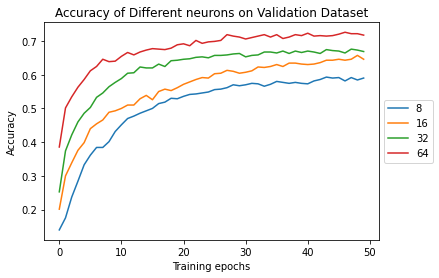

In [21]:
k_fold = KFold(n_splits=3, shuffle=True)
neuron_number=[8,16,32,64]
keras.backend.clear_session()
for i in neuron_number:
    model_history_per_fold=[]
    fold_no=1

    for train, test in k_fold.split(X_train,y_train):
        model = Sequential([
        Dense(i, activation='relu', input_shape=(57,)),
        Dropout(0.3),
        Dense(units = num_labels, activation='softmax')
        ])

        model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                
                metrics=['accuracy'])
                
        print('------------------------------------------------------------------------')
        print(f'Training for number of neuron {i} fold {fold_no} ...')

        history = model.fit(
        X_train[train],y_train[train],batch_size=8, epochs=50, verbose=0,validation_data=(X_train[test],y_train[test])
        )
        keras.backend.clear_session()

        model_history_per_fold.append(history)
        fold_no = fold_no + 1


    mean_val_accuracy_arr=np.array([model_history_per_fold[0].history['val_accuracy'],
                                    model_history_per_fold[1].history['val_accuracy'],
                                    model_history_per_fold[2].history['val_accuracy']])
    mean_val_accuracy=np.mean(mean_val_accuracy_arr, axis=0)

    print('')
    print('Mean Accuracy for number of neuron %d is %.2f%% (+/- %.2f%%)'%(i,mean_val_accuracy[-1]*100,np.std(mean_val_accuracy_arr, axis=0)[-1]*100))
    plt.plot(mean_val_accuracy,label=i)


    
    

plt.title('Accuracy of Different neurons on Validation Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Training epochs')
plt.legend(neuron_number, loc='center left', bbox_to_anchor=(1, 0.5)) 


## Question 3 Part B

Comment: 

From the graph, 2-layer model with 64 neurons has the highest test accuracy. 
Hence, optimal number of neurons for the hidden layer will be 64

## Question 3 Part C

Epoch 1/50
88/88 [==============================] - 1s 4ms/step - loss: 2.1378 - accuracy: 0.2786 - val_loss: 1.7114 - val_accuracy: 0.3833
Epoch 2/50
88/88 [==============================] - 0s 2ms/step - loss: 1.5980 - accuracy: 0.4529 - val_loss: 1.4445 - val_accuracy: 0.4733
Epoch 3/50
88/88 [==============================] - 0s 3ms/step - loss: 1.3608 - accuracy: 0.5200 - val_loss: 1.3207 - val_accuracy: 0.4900
Epoch 4/50
88/88 [==============================] - 0s 2ms/step - loss: 1.2282 - accuracy: 0.5757 - val_loss: 1.2202 - val_accuracy: 0.5300
Epoch 5/50
88/88 [==============================] - 0s 2ms/step - loss: 1.1267 - accuracy: 0.6029 - val_loss: 1.1615 - val_accuracy: 0.5533
Epoch 6/50
88/88 [==============================] - 0s 3ms/step - loss: 1.0151 - accuracy: 0.6571 - val_loss: 1.1203 - val_accuracy: 0.5767
Epoch 7/50
88/88 [==============================] - 0s 2ms/step - loss: 0.9860 - accuracy: 0.6500 - val_loss: 1.0869 - val_accuracy: 0.6200
Epoch 8/50
88/88 [==

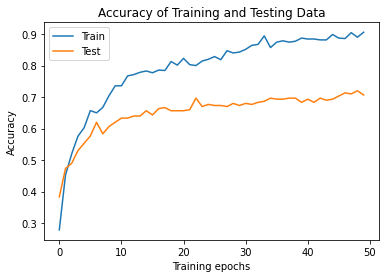

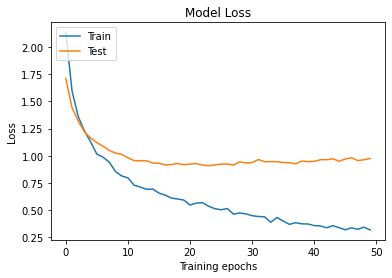

In [27]:

optimal_2_layer_model = Sequential([
    
    Dense(64, activation='relu', input_shape=(57,)),
    Dropout(0.3),
    Dense(units = num_labels, activation='softmax')
])


optimal_2_layer_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              #loss='mse',
              metrics=['accuracy'])

optimal_2_layer_history = optimal_2_layer_model.fit(
    X_train, y_train,batch_size=8, epochs=50, verbose=1,validation_data=(X_test, y_test)
)
keras.backend.clear_session()
plot_accuracy(optimal_2_layer_history)
plot_loss(optimal_2_layer_history)


## Question 3 Part D

Comment: 

There are still some parameters to be tuned, such as learning rate, activation functions, dropout rate, number of layers for this experiment.

Other than this experiment setting, there are parameters such as momentum beta, learning rate decay, regularization lambda and others.

# <a name="Q3">Question 4</a>

## Question 4 Part A

In [28]:
# 3 layer model with optimal nueron

keras.backend.clear_session()
three_layer_model = Sequential([
    
    Dense(64, activation='relu', input_shape=(57,)),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(units = num_labels, activation='softmax')
])

three_layer_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3712      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 8,522
Trainable params: 8,522
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
700/700 [==============================] - 2s 2ms/step - loss: 1.9237 - accuracy: 0.3300 - val_loss: 1.4900 - val_accuracy: 0.4700
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 1.3980 - accuracy: 0.5057 - val_loss: 1.2726 - val_accuracy: 0.5533
Epoch 3/50
700/700 [==============================] - 2s 2ms/step - loss: 1.1816 - accuracy: 0.6086 - val_loss: 1.1654 - val_accuracy: 0.5967
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 1.0605 - accuracy: 0.6243 - val_loss: 1.1765 - val_accuracy: 0.5933
Epoch 5/50
700/700 [==============================] - 2s 2ms/step - loss: 0.9715 - accuracy: 0.6814 - val_loss: 1.0879 - val_accuracy: 0.6200
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 0.8782 - accuracy: 0.6914 - val_loss: 1.0448 - val_accuracy: 0.6367
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 0.9084 - accuracy: 0.6814 - val_loss: 1.0196 - val_accuracy: 0.6333
Epoch 

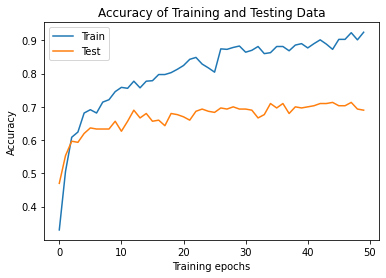

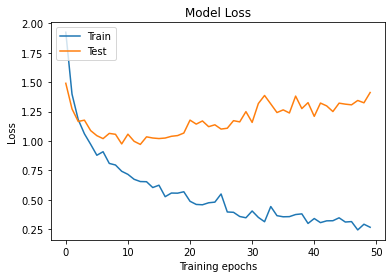

In [29]:

three_layer_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

three_layer_history = three_layer_model.fit(
    X_train, y_train,batch_size=1, epochs=50, verbose=1,validation_data=(X_test, y_test)
)
keras.backend.clear_session()
plot_accuracy(three_layer_history)
plot_loss(three_layer_history)


## Question 4 Part B

Answer:

Optimal 2-layer network has test accuracy 0.7067, but 3-layer
network has only 0.69 and its loss function is not converge. Optimal 2-layer network has better performance than the 3-layer network.

Although generally network with more number of hidden layer would have better performance, yet this optimal 2-layer network is still performing better than the 3-layer network.

This means a hyperparameter well-tuned network will have better performance.


# <a name="Q5">Question 5</a>

## Question 5 Part A

Epoch 1/50
700/700 [==============================] - 2s 2ms/step - loss: 2.1698 - accuracy: 0.2400 - val_loss: 1.7799 - val_accuracy: 0.3633
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 1.7600 - accuracy: 0.3700 - val_loss: 1.5712 - val_accuracy: 0.4367
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 1.4832 - accuracy: 0.4729 - val_loss: 1.4239 - val_accuracy: 0.5000
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 1.3883 - accuracy: 0.4986 - val_loss: 1.3569 - val_accuracy: 0.5000
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 1.2994 - accuracy: 0.5171 - val_loss: 1.2503 - val_accuracy: 0.5700
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 1.1829 - accuracy: 0.5671 - val_loss: 1.1915 - val_accuracy: 0.6033
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 1.1775 - accuracy: 0.5900 - val_loss: 1.1686 - val_accuracy: 0.6100
Epoch 

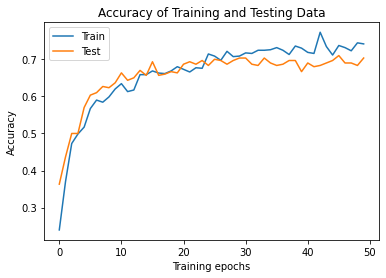

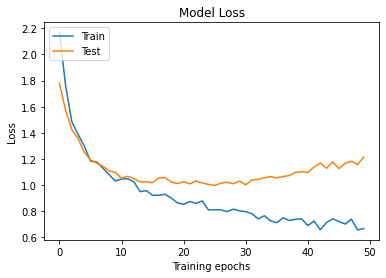

In [30]:
# 2 level with dropout

orig_model = Sequential([
    
    Dense(16, activation='relu', input_shape=(57,)),
    Dropout(0.3),
    Dense(units = num_labels, activation='softmax')
])

orig_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              #loss='mse',
              metrics=['accuracy'])

orig_history = orig_model.fit(
    X_train, y_train,batch_size=1, epochs=50, verbose=1,validation_data=(X_test, y_test)
)
keras.backend.clear_session()
plot_accuracy(orig_history)
plot_loss(orig_history)



Epoch 1/50
700/700 [==============================] - 2s 2ms/step - loss: 1.7255 - accuracy: 0.3843 - val_loss: 1.4250 - val_accuracy: 0.4733
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 1.1682 - accuracy: 0.5914 - val_loss: 1.2234 - val_accuracy: 0.5500
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 0.9604 - accuracy: 0.6886 - val_loss: 1.1238 - val_accuracy: 0.5800
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 0.8170 - accuracy: 0.7414 - val_loss: 1.0803 - val_accuracy: 0.5867
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 0.7182 - accuracy: 0.7743 - val_loss: 1.0303 - val_accuracy: 0.6300
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 0.6447 - accuracy: 0.7829 - val_loss: 1.0250 - val_accuracy: 0.6300
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 0.5629 - accuracy: 0.8257 - val_loss: 1.0226 - val_accuracy: 0.6333
Epoch 

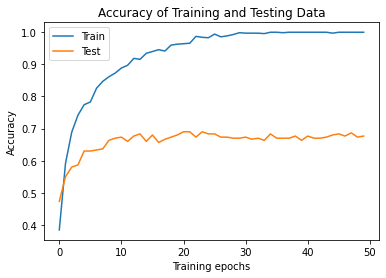

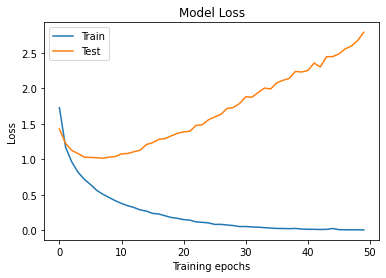

In [31]:
# 2 level without dropout

orig_without_dropout_model = Sequential([
    
    Dense(32, activation='relu', input_shape=(57,)),

    Dense(units = num_labels, activation='softmax')
])

orig_without_dropout_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              #loss='mse',
              metrics=['accuracy'])

orig_without_dropout_history = orig_without_dropout_model.fit(
    X_train, y_train,batch_size=1, epochs=50, verbose=1,validation_data=(X_test, y_test)
)
keras.backend.clear_session()
plot_accuracy(orig_without_dropout_history)
plot_loss(orig_without_dropout_history)



## Question 5 Part B

Answers:

Original 2-layer network with dropout has train accuracy 0.7414 and valid accuracy 0.7033, but without dropout, it has train accuracy 1.0000 and valid accuracy: 0.6767. 

This means that 2-layer network without dropout tends to over-fitting. Loss function of 2-layer network without dropout is also not converging. 

## Question 5 Part C

There are various other ways to avoid overfitting in the model, such as


*   Early Stopping avoids overfitting by attempting to automatically select the inflection point where performance on the test dataset starts to decrease while performance on the training dataset continues to improve as the model starts to overfit
*    Regularization by penalize the model during training on the magnitude of the activations or loss functions such as L1 and L2.
*   Weight Constraint to constrain the magnitude of weights to be within a range or below a limit.
*   Noise: Add statistical/random noise to inputs during training.





# <a name="Discuss">Discussions</a>

Comment:

Below are some findings after construct this classification model, and we assume we have the raw data of the audio waveforms:

* Using Engineered features do helps in constucting better models as it uses the best representation of the sample data to learn a solution to your problem. However, this also leads to lossing data interpretability and excessive removing of noise in training data that would leads to overfitting

* Out of the parameters that were tuned, number of neurons gives the most impact. This is because as the number of neurons increase, number of parameters of the network also increased.

* Instead of using FFN on engineered features, we can use a 2-D representation of the waveforms like Spectrograms as it works well with Convolutional Neural
Networks(CNN). If the dataset can be represented in image, CNN and Artificial Neural Network (ANN) also expected to perform well in terms on genre classification. Relevant pretrained models such as VGG-19 would be useful and achieve performance quickly.

* Other than genre classification, task such as Audio Classification e.g. identify the type or source of the music such as singer, or musical instruments;
Audio Separation and Segmentation e.g. in case we just want the sound of the violin from the rest of the musical performance; Music Generation and Music Transcription. 
For similar task such as identify the type or source of the music, changing the labels of the dataset and minor updates on the pipeline's parameters is sufficient as the classification does not differ much. However, for some task that are more complex that are mentioned above, choosing an appropriate neural network architecture with suitable presentation of dataset is needed.